<h1 align="center"><font size="5">Using Data Science to Understand Data Science:<br> A Canada-U.S. Comparison of the Labour Market<br></font></h1> 
<h2 align="center"><font size="3">Capstone Project as required for completion of the IBM Data Science Professional Certificate</font></h2>
<p style="text-align:center;"><font size="2"><i>by Pierre-Olivier Bonin 
    <a href="https://www.linkedin.com/in/pierreolivierbonin">(LinkedIn)</a>
    <a href="https://github.com/pierreolivierbonin">(GitHub)</a> </i></font></p>

## Table of contents<a name="ToC"></a>
### Overview
* [Introduction: Data Science in the U.S. & Canada](#introduction)
* [The Data](#data)
* [Preprocessing & Data Visualization](#preprocessing)
* [Machine Learning Modelling](#modelling)
* [Model Evaluation](#evaluation)
* [Discussion and Conclusions](#discussion)

### Code
* [Loading Data & Libraries](#load)
* [Preprocessing](#preprocessingcode)
* [Visualization and Exploratory Data Analysis](#vis+EDA)
* [Modelling & Evaluation](#modellingcode)

## Introduction: Data Science in the U.S. & Canada<a name="introduction"></a> 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kaggle has been surveying professionals working in the field of data science for a few years to improve our understanding of the dynamics of the job market. The datasets available are covering dozens of countries and territories across the world. While the Kaggle community has offered many insights around the case of the United States, there remains a lot to be discovered about data science in Canada. By shedding light specifically on the Canadian data science job market and comparing it with its counterpart in the United States, this data science project will help employers, employees, and candidates better understand the skills needed to become a data scientist, the education that is most common, the job titles they are likely to have, how the salaries are distributed, as well as whether these skills, education, titles, and salaries vary across the two countries. 

This is especially relevant in a time where work-from-home arrangements are becoming more prevalent. The current pandemic has brought about major restructurations in the industry. Companies are now looking to hire data scientists across the globe. Understanding the distinct features of a specific labour market should thus be of value for many stakeholders.

## The Data<a name="data"></a>


As mentioned above, the dataset that we will use come from Kaggle. The company conducts an annual survey and this one has been conducted from October 8th to October 28th of the year 2019. Respondents were “found primarily through Kaggle channels, like [their] email list, discussion forums and social media channels” (see: https://www.kaggle.com/c/kaggle-survey-2019/data?select=multiple_choice_responses.csv). In total, there were 19 717 respondents from 171 countries and territories across the globe.

## Preprocessing & Data Visualization <a name="preprocessing"></a>

This section systematically transforms and examines the data. Specifically, the notebook takes the reader through the whole process of this data science project. This includes all of the following steps:

**Preprocessing (ETL) the data:**

>- examining the full dataset
>- looking at the question labels of each questions to ensure a thorough understanding of the dataset
>- selecting features of interest
>- dropping the first row of the dataset, which contains question labels
>- examining the data types to ensure they are properly formatted
>- excluding students and unemployed individuals from the dataframe since we are seeking to examine the structure of the labour market as it stands and not as it may become once these respondents have landed a position in the field
>- creating a new dataframe with a reduced number of features as explained in our report
>- reducing the sample to a subsample including only Canadian and American respondents to fit with the objectives of our analysis
>- renaming the columns so we can intuitively understand the dataframe when looking at it in Python
>- replacing missing values with 0s and non-missing values with 1s in the questions pertaining to the languages used. We are aware that this question will be problematic because of the original format of the variable, which included multiple choice into a single variable which was then split into several dummy variables. We will therefore need to be careful in interpreting results around these features.
>- Dealing with missing values for modelling. In this study, we are simply going to drop the rows containing missing values.

**Data Visualization:**
> For the data visualization and exploratory analysis, we do two kinds of operation: 
<br>(1) comparing distributions between Canada and the U.S., and</br>
<br>(2) plotting interesting findings into appealing and (ideally) intuitive visualizations.</br>
<br>(3) visualizing a decision tree classifier to distinguish between features of the US vs. Canadian market.</br>

>For the coding of visualization, we use mostly Seaborn and the Tidyverse pipes, the latter of which you can find a neat explanation by Steven Morse [here](https://stmorse.github.io/journal/tidyverse-style-pandas.html)

## Machine Learning Modelling <a name="modelling"></a>

Given the nature of our problem, we build a few models and compare their performance, including:
> * Logistic Regression
> * Support Vector Machine
> * Decision Tree Classification
> * K-Nearest Neighbour

<center><h1>Loading Data & Libraries</h1></center><a name="load"></a>

>[Return to table of contents](#ToC)

In [1142]:
# Run these if not already installed (remove the hashtags) for the following lines:
#!pip install notebook --upgrade
#!pip install --upgrade matplotlib
#!pip install "notebook>=5.3" "ipywidgets>=7.2"
#!conda install --yes seaborn==0.11.0
# conda install -c anaconda nbformat

# Then, restart the Jupyter IDE

In [1143]:
# reset the default configuration for matplotlib
# plt.style.use('default')

In [1144]:
#importing relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy.optimize as opt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
# load the desired Seaborn theme #This mostly changes the background colour. 
# To be noted: it changes it for the rest of the notebook and every plot and 
# figure produced onwards uses the loaded theme.
sns.set_style("whitegrid")

In [1145]:
#loading the datasets
df=pd.read_csv("./multiple_choice_responses.csv", low_memory = False)
dfQuestions=pd.read_csv("./questions_only.csv")

<center><h1>Preprocessing</h1></center><a name="preprocessingcode"></a>

>[Return to table of contents](#ToC)

In [1146]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Access,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Relational Database Service,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS DynamoDB,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure SQL Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [1147]:
dfQuestions.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,...,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice


In [1148]:
dfQuestions_transposed=dfQuestions.transpose()

In [1149]:
pd.set_option('display.max_colwidth', None)
dfQuestions_transposed

,0
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5,Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6,What is the size of the company where you are employed?
Q7,Approximately how many individuals are responsible for data science workloads at your place of business?
Q8,Does your current employer incorporate machine learning methods into their business?
Q9,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice


In [1150]:
df.drop([0,], inplace=True)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [1151]:
df['Q5'].value_counts(ascending=False)

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Q5, dtype: int64

In [1152]:
df['Q3'].value_counts(ascending=False)

India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia               

In [1153]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [1154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 1 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.2+ MB


In [1155]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q2_OTHER_TEXT                          object
Q3                                     object
                                        ...  
Q34_Part_9                             object
Q34_Part_10                            object
Q34_Part_11                            object
Q34_Part_12                            object
Q34_OTHER_TEXT                         object
Length: 246, dtype: object

In [1156]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"]

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1157]:
df[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3
count,12841,4588,6532
unique,1,1,1
top,Python,R,SQL
freq,12841,4588,6532


In [1158]:
# First five programming languages (not "top 5", however)
df[["Q18_Part_1", "Q18_Part_3", "Q18_Part_4", "Q18_Part_5", "Q18_Part_6"]].describe()

,Q18_Part_1,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6
count,12841,6532,1672,2256,2267
unique,1,1,1,1,1
top,Python,SQL,C,C++,Java
freq,12841,6532,1672,2256,2267


In [1159]:
df.loc[:, "Q18_Part_1":"Q18_Part_12"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 1 to 19717
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q18_Part_1   12841 non-null  object
 1   Q18_Part_2   4588 non-null   object
 2   Q18_Part_3   6532 non-null   object
 3   Q18_Part_4   1672 non-null   object
 4   Q18_Part_5   2256 non-null   object
 5   Q18_Part_6   2267 non-null   object
 6   Q18_Part_7   2174 non-null   object
 7   Q18_Part_8   389 non-null    object
 8   Q18_Part_9   2037 non-null   object
 9   Q18_Part_10  1516 non-null   object
 10  Q18_Part_11  83 non-null     object
 11  Q18_Part_12  1148 non-null   object
dtypes: object(12)
memory usage: 2.0+ MB


### Exploring missing values and reducing the dataset

In [1160]:
# exploring missing values
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6     5715
Q7     6094
Q8     6490
Q10    7220
Q14    4027
Q15    4090
Q23    5535
dtype: int64

Here, we exclude students and unemployed respondents because we are mostly interested in the current actors of the data science labour market, not its prospective participants.

In [1161]:
df = df[~df['Q5'].isin(["Student", "Not employed"])]

In [1162]:
df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", "Q14", "Q15", "Q23"]].isna().sum()

Q1        0
Q2        0
Q3        0
Q4      394
Q5      610
Q6      759
Q7     1138
Q8     1534
Q10    2264
Q14    3309
Q15    3339
Q23    4220
dtype: int64

Here, we select a reduced number of features for the analysis

In [1163]:
newdf=df[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q10", 
          "Q14", "Q15", "Q18_Part_1", "Q18_Part_2", "Q18_Part_3", 
          "Q18_Part_4", "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", 
          "Q18_Part_9", "Q18_Part_10", "Q18_Part_11", "Q18_Part_12", "Q23"]]
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,1-2 years
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,2-3 years
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,< 1 years


In [1164]:
newdf.shape

(14761, 24)

In [1165]:
newdf.isna().sum()

Q1                 0
Q2                 0
Q3                 0
Q4               394
Q5               610
Q6               759
Q7              1138
Q8              1534
Q10             2264
Q14             3309
Q15             3339
Q18_Part_1      5398
Q18_Part_2     11109
Q18_Part_3      9333
Q18_Part_4     13812
Q18_Part_5     13405
Q18_Part_6     13163
Q18_Part_7     13041
Q18_Part_8     14408
Q18_Part_9     12998
Q18_Part_10    13799
Q18_Part_11    14692
Q18_Part_12    13745
Q23             4220
dtype: int64

In [1166]:
newdf.shape

(14761, 24)

In [1167]:
# We select only the two countries of interest
newdf=newdf[(newdf["Q3"]=="Canada")|(newdf["Q3"]=="United States of America")]
newdf["Q3"].value_counts()

United States of America    2489
Canada                       355
Name: Q3, dtype: int64

In [1168]:
# We verify if the operation was correctly conducted. It was.
newdf.shape

(2844, 24)

In [1169]:
newdf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q14,...,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q23
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [1170]:
newdf["Q3"].value_counts()

United States of America    2489
Canada                       355
Name: Q3, dtype: int64

In [1171]:
newdf[["Q18_Part_1", "Q18_Part_2", "Q18_Part_3", "Q18_Part_4", 
       "Q18_Part_5", "Q18_Part_6", "Q18_Part_7", "Q18_Part_8", "Q18_Part_9", 
       "Q18_Part_10", "Q18_Part_11", "Q18_Part_12"]].describe()

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
count,1831,898,1294,133,220,237,331,65,491,171,16,288
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,TypeScript,Bash,MATLAB,None,Other
freq,1831,898,1294,133,220,237,331,65,491,171,16,288


In [1172]:
newdf.rename(columns={"Q1":"age", "Q2":"gender", "Q3":"country", "Q4":"education", "Q5":"job", "Q6":"cpny_size", 
                      "Q7":"team_size", "Q8":"ML_methods", "Q10":"salary","Q14":"primary_tool", "Q15":"coding_exp", 
                      "Q18_Part_1":"Python", "Q18_Part_2":"R", "Q18_Part_3":"SQL", "Q18_Part_4":"C", 
                      "Q18_Part_5":"C++", "Q18_Part_6":"Java", "Q18_Part_7":"JavaScript", "Q18_Part_8":"TypeScript", 
                     "Q18_Part_9":"Bash", "Q18_Part_10":"MATLAB", "Q18_Part_11":"None", "Q18_Part_12":"Other",
                     "Q23":"ML_yrs"}, inplace=True)
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years


In [1173]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844 entries, 8 to 19434
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           2844 non-null   object
 1   gender        2844 non-null   object
 2   country       2844 non-null   object
 3   education     2794 non-null   object
 4   job           2763 non-null   object
 5   cpny_size     2728 non-null   object
 6   team_size     2658 non-null   object
 7   ML_methods    2603 non-null   object
 8   salary        2435 non-null   object
 9   primary_tool  2271 non-null   object
 10  coding_exp    2265 non-null   object
 11  Python        1831 non-null   object
 12  R             898 non-null    object
 13  SQL           1294 non-null   object
 14  C             133 non-null    object
 15  C++           220 non-null    object
 16  Java          237 non-null    object
 17  JavaScript    331 non-null    object
 18  TypeScript    65 non-null     object
 19  Bash 

Here, we transform missing values into 0s and values not missing into 1s

In [1174]:
newdf.loc[:, "Python":"Other"]=newdf.loc[:,"Python":"Other"].notnull().astype('int') # do the same to the original df

In [1175]:
newdf.loc[:, "Python":"Other"]

,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
8,1,0,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,0,0
16,1,1,1,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0,0,0,0,0
34,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19408,0,0,0,0,0,0,0,0,0,0,0,0
19415,0,0,0,0,0,0,0,0,0,0,0,0
19419,0,0,0,0,0,0,0,0,0,0,0,0
19432,0,0,0,0,0,0,0,0,0,0,0,0


In [1176]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
16,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,1-2 years
22,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
34,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years


<center><h1>Visualization and Exploratory Analysis</h1></center><a name="vis+EDA"></a>

>[Return to table of contents](#ToC)

In [1177]:
newdf=newdf.reset_index(drop=True)

In [1178]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years


In [1179]:
newdf.loc[:, "Python":"Other"]

,Python,R,SQL,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,0,0,0,0,0,0,0,0,0,0,0,0
2840,0,0,0,0,0,0,0,0,0,0,0,0
2841,0,0,0,0,0,0,0,0,0,0,0,0
2842,0,0,0,0,0,0,0,0,0,0,0,0


In [1323]:
grpdf=newdf[["country", "Python", "R", "SQL", "C", "C++", "Java", 
             "JavaScript", "TypeScript", "Bash", "MATLAB", "None", "Other"]]

In [1324]:
grpdf["country"].replace({"Canada":1, "United States of America":0})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

### Grouping by and conducting exploratory analyses

In [1195]:
newdf.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years
1,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
2,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,1-2 years
3,35-39,Male,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,2-3 years
4,30-34,Female,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,0,3-4 years


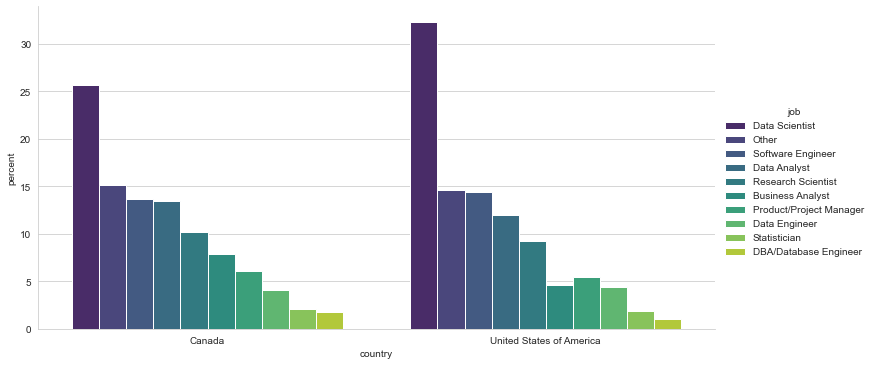

In [1196]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2, 
       palette="viridis")
 .savefig("Data Science Jobs.png"))


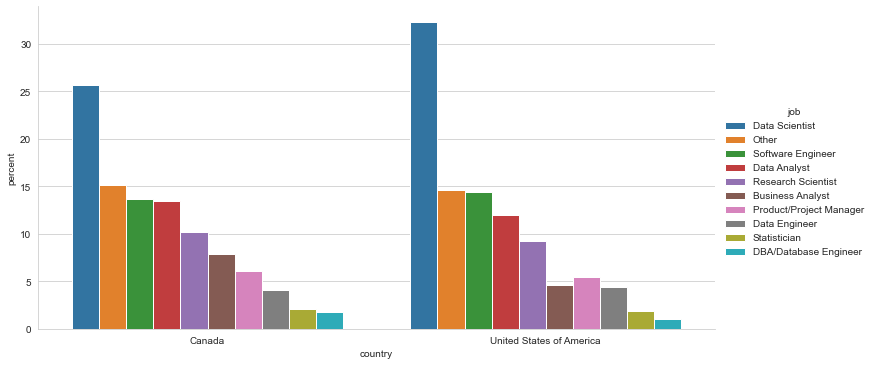

In [1197]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'job'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [1198]:
(dfvis
.groupby('country')['job']
.value_counts(ascending=False, normalize=True)
.mul(100))

country                   job                    
Canada                    Data Scientist             25.655977
                          Other                      15.160350
                          Software Engineer          13.702624
                          Data Analyst               13.411079
                          Research Scientist         10.204082
                          Business Analyst            7.871720
                          Product/Project Manager     6.122449
                          Data Engineer               4.081633
                          Statistician                2.040816
                          DBA/Database Engineer       1.749271
United States of America  Data Scientist             32.314050
                          Other                      14.628099
                          Software Engineer          14.380165
                          Data Analyst               12.024793
                          Research Scientist          9.214876
     

In [1199]:
(dfvis
 .groupby('country')['C']
 .value_counts(ascending=False, normalize=True)
 .mul(100))

country                   C
Canada                    0    95.492958
                          1     4.507042
United States of America  0    95.299317
                          1     4.700683
Name: C, dtype: float64

In [1200]:
dfvis.columns

Index(['age', 'gender', 'country', 'education', 'job', 'cpny_size',
       'team_size', 'ML_methods', 'salary', 'primary_tool', 'coding_exp',
       'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'JavaScript', 'TypeScript',
       'Bash', 'MATLAB', 'None', 'Other', 'ML_yrs'],
      dtype='object')

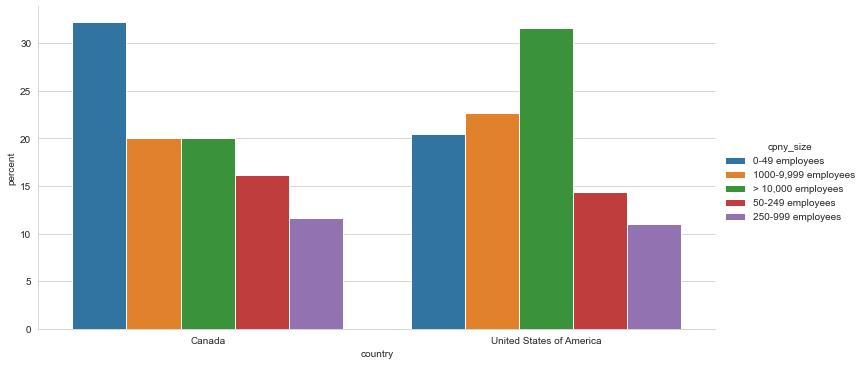

In [1201]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'cpny_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [1202]:
dfvis.columns

Index(['age', 'gender', 'country', 'education', 'job', 'cpny_size',
       'team_size', 'ML_methods', 'salary', 'primary_tool', 'coding_exp',
       'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'JavaScript', 'TypeScript',
       'Bash', 'MATLAB', 'None', 'Other', 'ML_yrs'],
      dtype='object')

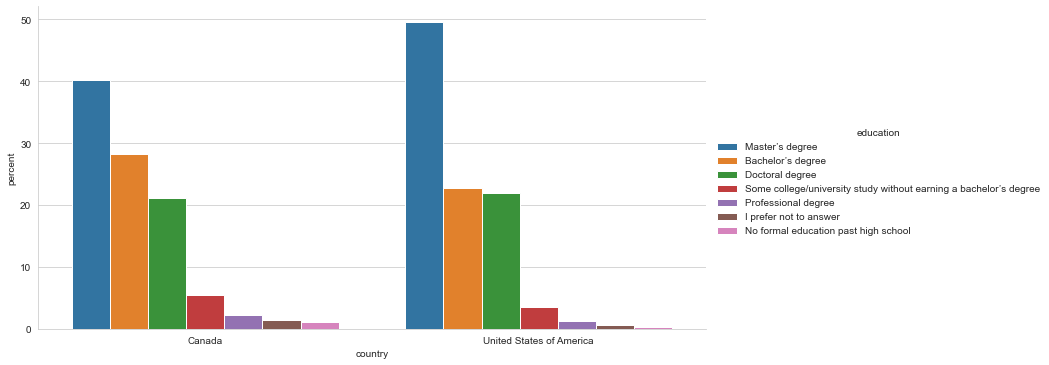

In [1203]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'education'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

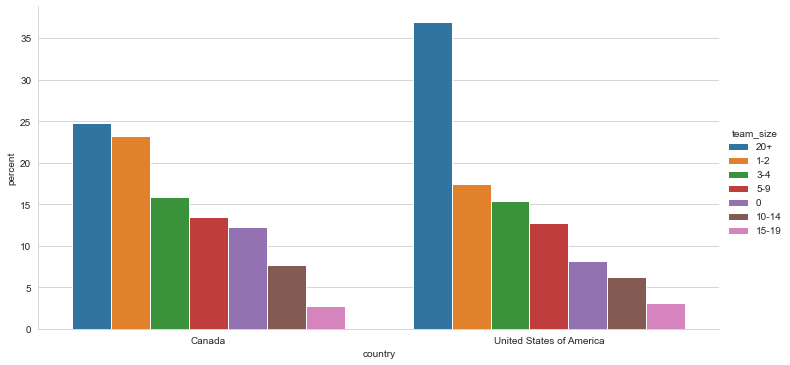

In [1204]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'team_size'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

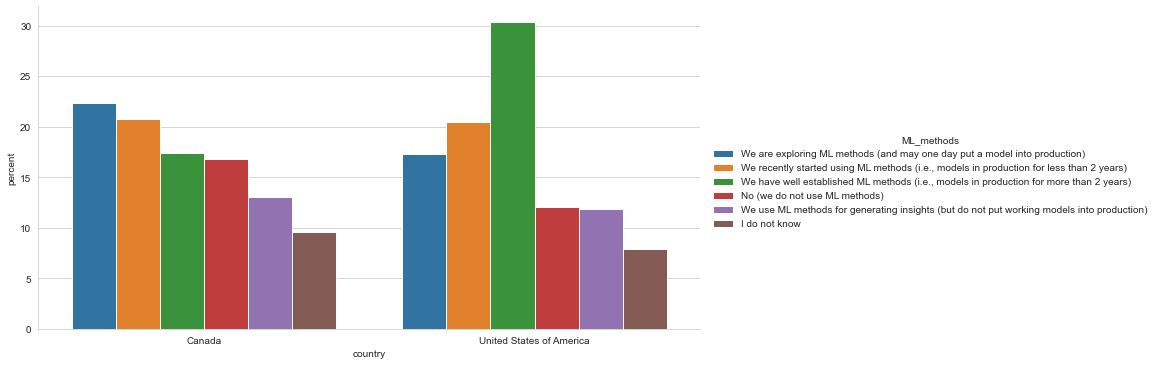

In [1205]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_methods'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

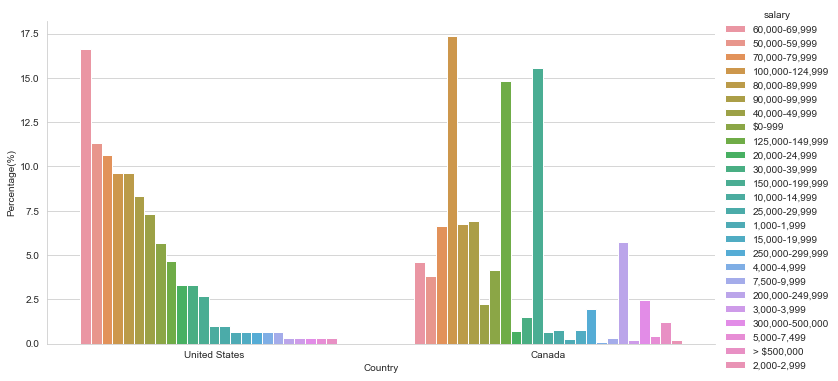

In [1206]:
# code inspired by: 
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salary'

(dfvis
 .groupby(x)[y]
 .value_counts(ascending=False, normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada']))

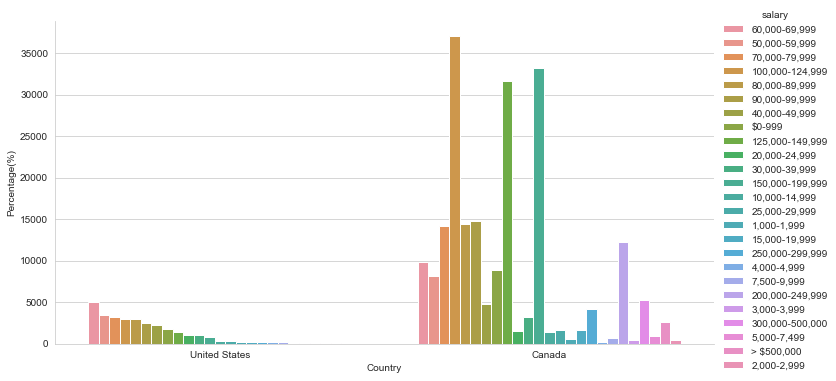

In [1207]:
# code inspired by: 
# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salary'

(dfvis
 .groupby(x)[y]
 .value_counts()
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada']))

In [1208]:
dfvis['salary'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [1209]:
dfvis['salaryOrd']=dfvis['salary']
dfvis['salaryOrd'].unique()

array(['80,000-89,999', '90,000-99,999', '125,000-149,999',
       '150,000-199,999', '100,000-124,999', '200,000-249,999', nan,
       '70,000-79,999', '60,000-69,999', '50,000-59,999', '40,000-49,999',
       '10,000-14,999', '> $500,000', '$0-999', '25,000-29,999',
       '300,000-500,000', '7,500-9,999', '20,000-24,999',
       '250,000-299,999', '30,000-39,999', '1,000-1,999', '3,000-3,999',
       '15,000-19,999', '5,000-7,499', '4,000-4,999', '2,000-2,999'],
      dtype=object)

In [1210]:
dfvis['salaryOrd'].replace({'$0-999':0, '1,000-1,999':1, '2,000-2,999':2,
                           '3,000-3,999':3, '4,000-4,999':4, '5,000-7,499':5, 
                           '7,500-9,999':6, '10,000-14,999':7,'15,000-19,999':8,
                           '20,000-24,999':9, '25,000-29,999':10, '30,000-39,999':11,
                           '40,000-49,999':12, '50,000-59,999':13,'60,000-69,999':14,
                           '70,000-79,999':15, '80,000-89,999':16, '90,000-99,999':17,
                           '100,000-124,999':18,'125,000-149,999':19,'150,000-199,999':20,
                           '200,000-249,999':21,'250,000-299,999':22, '300,000-500,000':23,
                           '> $500,000':24}, inplace=True)
dfvis['salaryOrd'].unique()

array([16., 17., 19., 20., 18., 21., nan, 15., 14., 13., 12.,  7., 24.,
        0., 10., 23.,  6.,  9., 22., 11.,  1.,  3.,  8.,  5.,  4.,  2.])

In [1211]:
dfvis['salaryOrd'].value_counts()

18.0    399
20.0    340
19.0    330
16.0    173
17.0    173
15.0    173
14.0    148
21.0    123
13.0    115
0.0     106
12.0     70
23.0     53
22.0     44
11.0     42
24.0     27
9.0      25
10.0     19
8.0      18
7.0      17
5.0      10
6.0       9
1.0       8
3.0       5
4.0       4
2.0       4
Name: salaryOrd, dtype: int64

Text(0.5, 1.0, 'whitegrid')

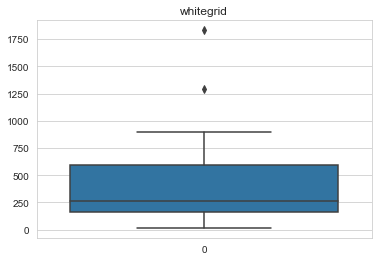

In [1212]:
# We try to compare languages used
sns.boxplot(data=dfvis.loc[:, 'Python':'Other'].sum())
plt.title("whitegrid")

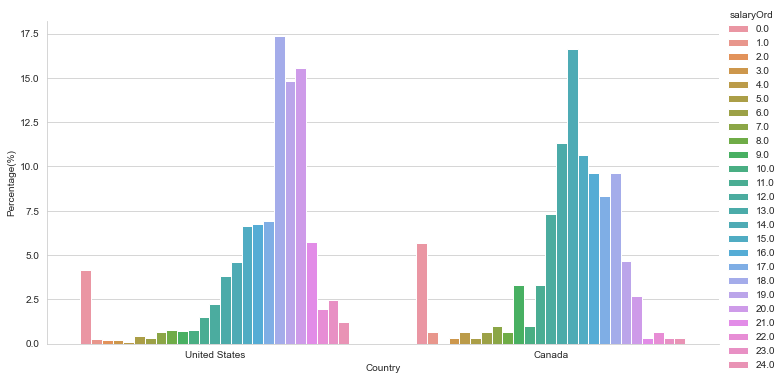

In [1296]:
# code inspired by: 
# Pietro Battiston --> https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'salaryOrd'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True).sort_index(ascending=False)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2, legend_out=True)
 .set_axis_labels("Country", "Percentage(%)")
 .set_titles("{col_name} {col_var}")
 .set(xticks=[0,1], xticklabels=['United States', 'Canada'])
 .savefig("US-Can salary distribution.png"))



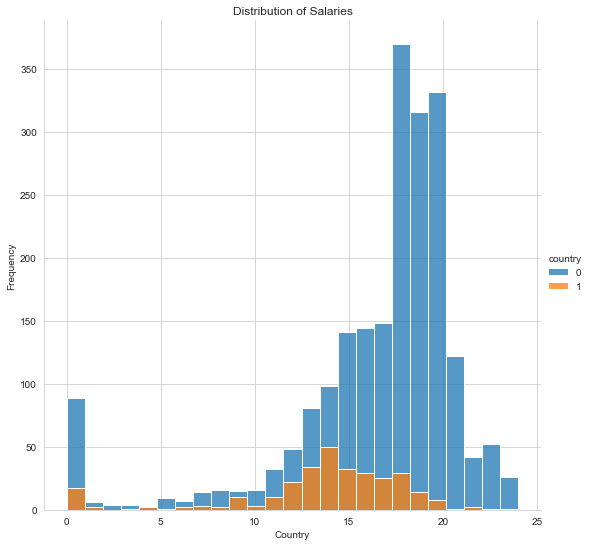

In [1305]:
# code inspired by: 
# https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
# as well as generic Seaborn documentation
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.FacetGrid(dfvis, hue='country', height=7.5)
 
g.map(sns.histplot, 
      'salaryOrd', bins=25,
      kde=False).add_legend()
 
g.set(xlabel='Country',
      ylabel='Frequency',
      title='Distribution of Salaries')

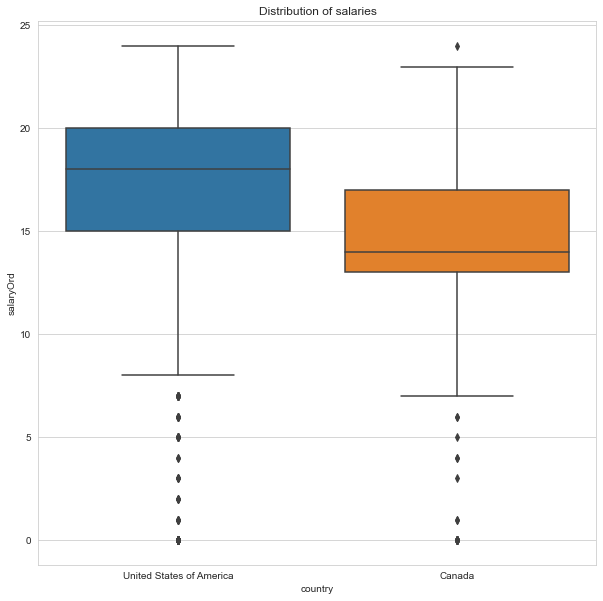

In [1215]:
# Here a boxplot with Seaborn. It's good for group comparisons of continuous variables. (I do love seaborn, indeed.
# Inspiration for the code is still: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
g = sns.boxplot(x='country', y='salaryOrd', data=dfvis, ax=ax)
g.set(title='Distribution of salaries')
g.xaxis.get_ticklabels()
fig = g.get_figure()
fig.savefig("US-Can salary distribution boxplot.png")

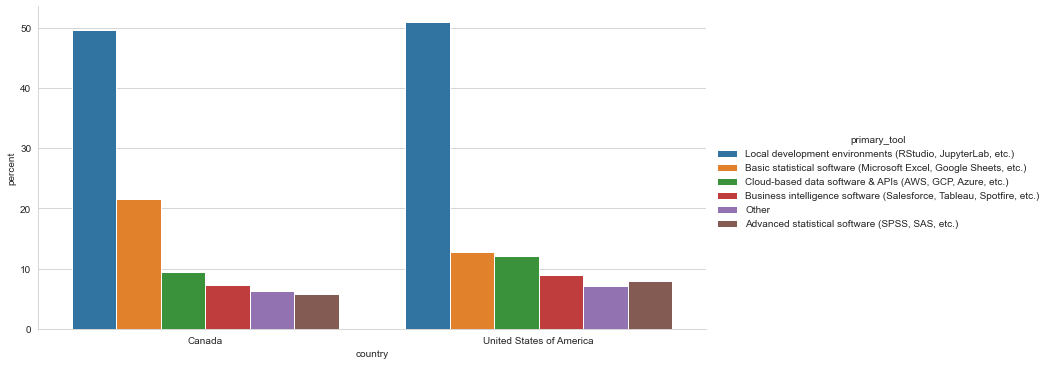

In [1216]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'primary_tool'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

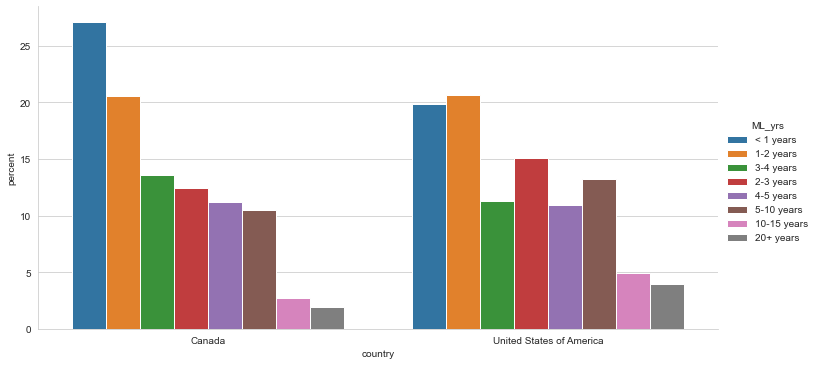

In [1217]:
#code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
import numpy as np
import pandas as pd
import seaborn as sns

dfvis = newdf

x,y = 'country', 'ML_yrs'

(dfvis
 .groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), 
       x=x,y='percent', 
       hue=y,kind='bar', 
       height=5, aspect=2,))

In [1218]:
newdf.head(1)

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd
0,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,3-4 years,16.0


<center><h1>Modelling & Evaluation</h1></center><a name="modellingcode"></a>

>[Return to table of contents](#ToC)

### Pre-processing: reformatting features and normalizing values for ML models

In [1219]:
dfML=newdf
dfML.shape

(2844, 25)

In [1220]:
dfML["age"].value_counts()

30-34    562
25-29    549
35-39    415
40-44    299
45-49    247
22-24    200
50-54    189
55-59    145
60-69    140
18-21     54
70+       44
Name: age, dtype: int64

In [1221]:
dfML["age"].replace({"18-21":0,"22-24":1,"25-29":2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-69":9,"70+":10}, inplace=True)

In [1222]:
dfML["age"].value_counts()

3     562
2     549
4     415
5     299
6     247
1     200
7     189
8     145
9     140
0      54
10     44
Name: age, dtype: int64

In [1223]:
dfML["country"].value_counts()

United States of America    2489
Canada                       355
Name: country, dtype: int64

In [1224]:
dfML["gender"].replace({"Male":0, "Female":1,"Prefer not to say":2,"Prefer to self-describe":2}, inplace=True)

In [1225]:
dfML[["gender"]].value_counts()

gender
0         2237
1          536
2           71
dtype: int64

In [1226]:
dfML.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd
0,1,1,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,3-4 years,16.0
1,3,0,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,2-3 years,17.0
2,7,1,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,1-2 years,19.0
3,4,0,United States of America,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,2-3 years,19.0
4,3,1,United States of America,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,3-4 years,20.0


In [1227]:
dfML["country"].replace({"United States of America":0, "Canada":1}, inplace=True)
dfML.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,...,C++,Java,JavaScript,TypeScript,Bash,MATLAB,None,Other,ML_yrs,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,3-4 years,16.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,2-3 years,17.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,1-2 years,19.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,2-3 years,19.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",...,0,0,0,0,0,0,0,0,3-4 years,20.0


In [1228]:
# Now we reduce the number of features to build and train a model
dfML2=dfML.loc[:, "age":"primary_tool"]
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)"
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)"


In [1229]:
dfML2['salaryOrd']=dfML['salaryOrd']

In [1230]:
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,salary,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","80,000-89,999","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"90,000-99,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","150,000-199,999","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [1231]:
dfML2=dfML2.drop(['salary'], axis=1)
dfML2.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,"> 10,000 employees",20+,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,250-999 employees,10-14,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,"> 10,000 employees",20+,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [1232]:
dfML2['cpny_size'].unique() #this variable is ordinal, so we're gonna recode accordingly

array(['> 10,000 employees', '50-249 employees', '250-999 employees',
       '1000-9,999 employees', '0-49 employees', nan], dtype=object)

In [1233]:
dfML2["cpny_size"].replace({"0-49 employees":0, "50-249 employees":1,"250-999 employees":2,"1000-9,999 employees":3, "> 10,000 employees":4}, inplace=True)
dfML2["cpny_size"].head()

0    4.0
1    4.0
2    1.0
3    2.0
4    4.0
Name: cpny_size, dtype: float64

In [1234]:
dfML2['team_size'].unique() # same here

array(['20+', '1-2', '10-14', '3-4', '5-9', '15-19', '0', nan],
      dtype=object)

In [1235]:
dfML2['team_size'].replace({'0':0, '1-2':1, '3-4':2, '5-9':3, '10-14':4, '15-19':5, '20+':6}, inplace=True)
dfML2['team_size'].head()

0    6.0
1    6.0
2    1.0
3    4.0
4    6.0
Name: team_size, dtype: float64

In [1236]:
dfML2['education'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', nan], dtype=object)

In [1237]:
dfML2['ML_methods'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['We recently started using ML methods (i.e., models in production for less than 2 years)',
       'I do not know',
       'We use ML methods for generating insights (but do not put working models into production)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We are exploring ML methods (and may one day put a model into production)',
       'No (we do not use ML methods)', nan], dtype=object)

In [1238]:
dfML2['primary_tool'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Local development environments (RStudio, JupyterLab, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', nan,
       'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)'], dtype=object)

In [1239]:
dfML2['job'].unique() # this is not ordinal, so we'll use One-Hot Encoding later (see next section)

array(['Data Scientist', 'Product/Project Manager', 'Data Analyst',
       'Other', 'Research Scientist', 'Data Engineer', 'Business Analyst',
       'Software Engineer', 'Statistician', 'DBA/Database Engineer', nan],
      dtype=object)

In [1240]:
dfML2.isna().sum()

age               0
gender            0
country           0
education        50
job              81
cpny_size       116
team_size       186
ML_methods      241
primary_tool    573
salaryOrd       409
dtype: int64

In [1241]:
dfML3=dfML2.dropna() #we decide to simply drop the rows in which there are missing values
dfML3.shape

(2271, 10)

In [1242]:
dfML3.head()

,age,gender,country,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd
0,1,1,0,Bachelor’s degree,Data Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0
1,3,0,0,Master’s degree,Product/Project Manager,4.0,6.0,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0
2,7,1,0,Master’s degree,Data Analyst,1.0,1.0,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
3,4,0,0,Bachelor’s degree,Other,2.0,4.0,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0
4,3,1,0,Master’s degree,Research Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0


In [1243]:
dfML3['country'].value_counts() #we're good to go since we still have enough of both subsamples to make a comparison.

0    1997
1     274
Name: country, dtype: int64

#### What if we use imputation to fill out missing values?
Let's try the Nearest Neighbours Imputation method suggested in Sci-kit learn documentation (https://scikit-learn.org/stable/modules/impute.html)

In [1244]:
dfML4=dfML2
dfML4.shape

(2844, 10)

In [1245]:
dfML4.dtypes

age               int64
gender            int64
country           int64
education        object
job              object
cpny_size       float64
team_size       float64
ML_methods       object
primary_tool     object
salaryOrd       float64
dtype: object

In [1246]:
Features3 = dfML4[['age', 'gender', 'education', 'job', 'cpny_size', 'team_size', 'ML_methods', 'primary_tool', 'salaryOrd']]
Features3 = pd.concat([Features, pd.get_dummies(dfML4['ML_methods'])], axis=1)
Features3.dtypes
Features3= Features3[['age', 'gender', 'cpny_size', 'team_size', 'salaryOrd','Bachelor’s degree',
                       'Master’s degree','No formal education past high school','Doctoral degree', 
                       'Professional degree']]

In [1247]:
Features3.dtypes

age                                     float64
gender                                  float64
cpny_size                               float64
team_size                               float64
salaryOrd                               float64
Bachelor’s degree                       float64
Master’s degree                         float64
No formal education past high school    float64
Doctoral degree                         float64
Professional degree                     float64
dtype: object

In [1248]:
from sklearn.impute import KNNImputer
nan=np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(Features3)

array([[1.00e+00, 1.00e+00, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 0.00e+00, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [7.00e+00, 1.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [4.21e+00, 2.23e-01, 2.26e+00, ..., 3.52e-03, 2.21e-01, 1.50e-02],
       [4.21e+00, 2.23e-01, 2.26e+00, ..., 3.52e-03, 2.21e-01, 1.50e-02],
       [4.21e+00, 2.23e-01, 2.26e+00, ..., 3.52e-03, 2.21e-01, 1.50e-02]])

### Features Selection & One-Hot Encoding (for categorical variables)

In [1249]:
Features = dfML3[['age', 'gender', 'education', 'job', 'cpny_size', 'team_size', 'ML_methods', 'primary_tool', 'salaryOrd']]
Features = pd.concat([Features, pd.get_dummies(dfML3['ML_methods'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,ML_methods,primary_tool,salaryOrd,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Local development environments (RStudio, JupyterLab, etc.)",16.0,0,0,0,0,1,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,I do not know,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,1,0,0,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,We use ML methods for generating insights (but do not put working models into production),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,0,0,1
3,4,0,Bachelor’s degree,Other,2.0,4.0,"We have well established ML methods (i.e., models in production for more than 2 years)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,1,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"We recently started using ML methods (i.e., models in production for less than 2 years)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,0,0,0,0,1,0


In [1250]:
Features=Features.drop(['ML_methods'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,0,0,0,0,1,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,1,0,0,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,0,0,1
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,1,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,0,0,0,0,1,0


In [1251]:
Features=Features.drop(['I do not know'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,0,0,0,1,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,0,0,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,0,1
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,1,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,0,0,0,1,0


In [1252]:
Features = pd.concat([Features, pd.get_dummies(dfML3['primary_tool'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,primary_tool,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),"Advanced statistical software (SPSS, SAS, etc.)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,"Local development environments (RStudio, JupyterLab, etc.)",16.0,0,0,0,1,0,0,0,0,0,1,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",17.0,0,0,0,0,0,0,1,0,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,0,0,1,0,1,0,0,0,0
3,4,0,Bachelor’s degree,Other,2.0,4.0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",19.0,0,0,1,0,0,0,1,0,0,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",20.0,0,0,0,1,0,0,0,0,1,0,0


In [1253]:
Features=Features.drop(['primary_tool'], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),"Advanced statistical software (SPSS, SAS, etc.)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,16.0,0,0,0,1,0,0,0,0,0,1,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,17.0,0,0,0,0,0,0,1,0,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,19.0,0,0,0,0,1,0,1,0,0,0,0
3,4,0,Bachelor’s degree,Other,2.0,4.0,19.0,0,0,1,0,0,0,1,0,0,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,20.0,0,0,0,1,0,0,0,0,1,0,0


In [1254]:
Features = pd.concat([Features, pd.get_dummies(dfML3['education'])], axis=1)
Features.head()

,age,gender,education,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)",...,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
0,1,1,Bachelor’s degree,Data Scientist,4.0,6.0,16.0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,3,0,Master’s degree,Product/Project Manager,4.0,6.0,17.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7,1,Master’s degree,Data Analyst,1.0,1.0,19.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,Bachelor’s degree,Other,2.0,4.0,19.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3,1,Master’s degree,Research Scientist,4.0,6.0,20.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [1255]:
Features=Features.drop(['education'], axis=1)
Features.head()

,age,gender,job,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",...,"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
0,1,1,Data Scientist,4.0,6.0,16.0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,3,0,Product/Project Manager,4.0,6.0,17.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7,1,Data Analyst,1.0,1.0,19.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,Other,2.0,4.0,19.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3,1,Research Scientist,4.0,6.0,20.0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [1256]:
Features.columns

Index(['age', 'gender', 'job', 'cpny_size', 'team_size', 'salaryOrd',
       'No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We use ML methods for generating insights (but do not put working models into production)',
       'Advanced statistical software (SPSS, SAS, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)', 'Other',
       'Bachelor’s degree', 'Doctoral degree', 'I prefer not to answer',
       'Master’s degree', 'No formal education past high school',
       'Profes

In [1257]:
Features = pd.concat([Features, pd.get_dummies(dfML3['job'])], axis=1)
Features=Features.drop(['job'], axis=1)
Features.head()

,age,gender,cpny_size,team_size,salaryOrd,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production),...,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician
0,1,1,4.0,6.0,16.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,4.0,6.0,17.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7,1,1.0,1.0,19.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,4,0,2.0,4.0,19.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,1,4.0,6.0,20.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1258]:
#There was a problem of missing values when modelling, so we need to deal with them before we can model a Logistic Regression
Features.shape

(2271, 33)

In [1259]:
Features2=Features.dropna()
Features2.shape

(2271, 33)

In [1260]:
# Let's further reduce our subset of predictors
X=np.asarray(Features2[['age', 'gender', 'cpny_size', 'team_size', 'salaryOrd','Bachelor’s degree',
                       'Master’s degree','No formal education past high school','Doctoral degree', 
                       'Professional degree']])
X[0:5]

array([[ 1.,  1.,  4.,  6., 16.,  1.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  4.,  6., 17.,  0.,  1.,  0.,  0.,  0.],
       [ 7.,  1.,  1.,  1., 19.,  0.,  1.,  0.,  0.,  0.],
       [ 4.,  0.,  2.,  4., 19.,  1.,  0.,  0.,  0.,  0.],
       [ 3.,  1.,  4.,  6., 20.,  0.,  1.,  0.,  0.,  0.]])

In [1261]:
y = np.asarray(dfML3['country'])
y [0:5]

array([0, 0, 0, 0, 0])

In [1262]:
y.shape

(2271,)

### Normalizing the data

In [1263]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.39,  1.7 ,  1.14,  1.17, -0.08,  1.81, -0.97, -0.06, -0.53,
        -0.12],
       [-0.52, -0.49,  1.14,  1.17,  0.12, -0.55,  1.03, -0.06, -0.53,
        -0.12],
       [ 1.21,  1.7 , -0.83, -1.1 ,  0.53, -0.55,  1.03, -0.06, -0.53,
        -0.12],
       [-0.09, -0.49, -0.17,  0.26,  0.53,  1.81, -0.97, -0.06, -0.53,
        -0.12],
       [-0.52,  1.7 ,  1.14,  1.17,  0.74, -0.55,  1.03, -0.06, -0.53,
        -0.12]])

In [1264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 10) (1816,)
Test set: (455, 10) (455,)


In [1265]:
y_train[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [1266]:
y_test[0:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

### Logistic Regression Modelling

In [1267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.20, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.2, solver='liblinear')

In [1268]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.0

In [1269]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       409
           1       0.00      0.00      0.00        46

    accuracy                           0.90       455
   macro avg       0.45      0.50      0.47       455
weighted avg       0.81      0.90      0.85       455



/Users/Pierre-Olivier/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Nearest Neighbour

In [1270]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [1271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1816, 10) (1816,)
Test set: (455, 10) (455,)


In [1272]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [1273]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8849118942731278
Test set Accuracy:  0.8879120879120879


In [1274]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMat = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81, 0.87, 0.85, 0.89, 0.88, 0.89, 0.88, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.9 , 0.89, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
       0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ])

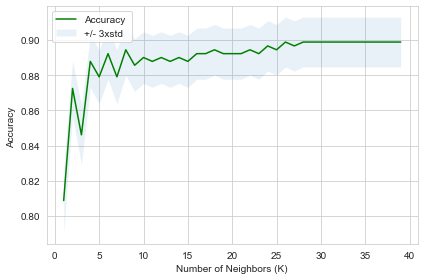

In [1275]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [1276]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8989010989010989 with k= 26


In [1277]:
KNNfinal=KNeighborsClassifier(n_neighbors = 26).fit(X_train,y_train)
KNNfinal

KNeighborsClassifier(n_neighbors=26)

### Decision Tree

In [1278]:
from sklearn.tree import DecisionTreeClassifier

In [1279]:
# sklearn does not support categorical variables. Fortunately, we already converted categorical variables to numerical features
# here we keep the same threshold (0.2, meaning 80% train and 20% test) for splitting the train-test subsets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [1280]:
# verify if dimensions are matching
X_trainset.shape

(1816, 10)

In [1281]:
y_trainset.shape

(1816,)

In [1282]:
X_testset.shape

(455, 10)

In [1283]:
y_testset.shape

(455,)

In [1284]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree
loanTree.fit(X_trainset,y_trainset)
DTfinal=loanTree.fit(X_trainset, y_trainset)
DTfinal

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [1285]:
# Decision Tree
predTree = loanTree.predict(X_testset)
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8945054945054945


In [1286]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='weighted')

0.8499458826225917

# Support Vector Machine

In [1287]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
SVMfinal=clf.fit(X_train, y_train)
SVMfinal

SVC()

In [1288]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [1289]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8510429385429386

## Now we're ready to compare the performance of each model on the test set

### K-Nearest-Neighbour

In [1290]:
yhat2 = KNNfinal.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.2f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.85
Jaccard score: 0.00


### Decision Tree Classifier

In [1291]:
yhat3=DTfinal.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.2f" % jaccard_score(y_test, yhat3))

Avg F1-score: 0.86
Jaccard score: 0.02


### Support Vector Machine

In [1292]:
yhat2=SVMfinal.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.2f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.85
Jaccard score: 0.00


### Logistic Regression

In [1293]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)
# Here we need to be careful; log loss requires 'predict_proba', not simply 'predict'
yhat2 = LR.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat))

# F1 score
yhat2=LR.predict(X_test)
print("Avg F1-score: %.2f" % f1_score(y_test, yhat2, average='weighted'))

LogLoss: 3.49
Avg F1-score: 0.85


<h1><center>Discussion and Conclusions</h1></center><a name="discussion"></a>

>[Return to table of contents](#ToC)